# Document Vector Representation

In [266]:
import re
import time
import nltk
import gensim
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blancacrosguardia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/blancacrosguardia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/blancacrosguardia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [267]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
                                background_color='black'):
    plt.figure(figsize=(10, 10))
    wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
                          normalize_plurals=False, background_color=background_color).generate_from_frequencies(
        dict_freqs)
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def get_food_words_in_my_corpus(words_dictionary):
    # Get a representative list of words in the food topic
    food = wordnet.synset('food.n.02')
    food_words = list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))
    
    # Select the words in the dic
    words_dictionary_keys = list(words_dictionary.keys())
    my_food = []
    for food_name in food_words:
        if food_name in words_dictionary_keys:
            my_food.append(food_name)
    
    return my_food

In [268]:
data = pd.read_csv('/Users/blancacrosguardia/Desktop/all_women_in_tech/week_5/notebooks/Reviews.csv')

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Work only with data older than 2010

In [270]:
data['year'] = pd.to_datetime(data['Time'],unit='s').dt.year
recient_dat = data[data['year']>2010]
corpus = recient_dat['Text'].tolist()

In [271]:
recient_dat.shape

(361958, 11)

In [272]:
sample_data = recient_dat.sample(n=100000,random_state=1) #Take random sampla of data from de dataframe

In [273]:
sample_data.shape

(100000, 11)

In [274]:
sampla_def = sample_data.reset_index(drop=True)

# Natural Language Processing - Data pre-processing

## Bag of Words

In [209]:
start = time.time()

matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(sampla_def['Text']).toarray()

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 7.15187406539917 sec to fit and transform all documents.


In [210]:
X.shape

(100000, 1000)

In [211]:
X #each row is each review, each number is how many times is used, aka freq of each word

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [212]:
matrix.vocabulary_

{'this': 882,
 'up': 922,
 'at': 59,
 'local': 497,
 'today': 893,
 'after': 22,
 'recently': 711,
 'an': 41,
 'on': 600,
 'they': 875,
 'got': 377,
 'me': 527,
 'good': 376,
 'once': 601,
 'you': 996,
 'the': 869,
 'top': 898,
 'it': 451,
 'has': 396,
 'one': 602,
 'of': 590,
 'those': 883,
 'no': 573,
 'mess': 534,
 'type': 916,
 'that': 868,
 'out': 622,
 'only': 605,
 'as': 58,
 'long': 499,
 'is': 447,
 'to': 892,
 'bottle': 108,
 'in': 438,
 'taste': 854,
 'and': 42,
 'flavor': 335,
 'used': 925,
 'water': 949,
 'half': 391,
 'second': 751,
 'liquid': 491,
 'flavoring': 338,
 'for': 343,
 'bit': 96,
 'much': 556,
 'was': 946,
 'not': 579,
 'could': 211,
 'would': 986,
 'similar': 777,
 'br': 115,
 'found': 346,
 'if': 436,
 'really': 707,
 'want': 943,
 'be': 80,
 'flavored': 336,
 'with': 976,
 'hint': 415,
 'have': 398,
 'use': 924,
 'longer': 500,
 'tried': 906,
 'my': 558,
 'tasted': 855,
 'better': 93,
 'but': 128,
 'enough': 285,
 'glass': 370,
 '24': 8,
 'per': 645,
 'can'

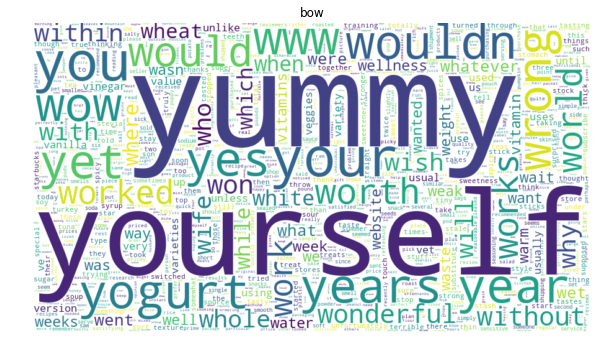

In [213]:
bow_dict = matrix.vocabulary_
dict_freqs = bow_dict
title= 'bow'
visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=1000,
                                background_color='white')

In [184]:
food = wordnet.synset('food.n.02')
food_words = list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))
    
food_words[:10]

['veggie',
 'bell_apple',
 'lime',
 'breast_of_lamb',
 'bluepoint',
 'entrecote',
 'chilly',
 'kail',
 'hard_roll',
 'brat']

## TF-IDF

In [275]:
start = time.time()

vectorizer = TfidfVectorizer(max_df=5000, min_df=1000) #en cuantas reviews aparece una palabra
X_tfidf = vectorizer.fit_transform(sampla_def['Text'])

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 6.71170973777771 sec to fit and transform all documents.


In [276]:
X_tfidf.shape

(100000, 588)

In [277]:
X_array = X_tfidf.toarray()

In [278]:
tfidf_dict = vectorizer.vocabulary_

In [279]:
tfidf_dict

{'okay': 361,
 'although': 22,
 'ingredients': 270,
 'whole': 569,
 'grain': 232,
 'wheat': 566,
 'juice': 281,
 'oil': 359,
 'honey': 256,
 'brown': 71,
 'rice': 443,
 'syrup': 510,
 'salt': 449,
 'cinnamon': 100,
 'help': 247,
 'contains': 116,
 'four': 210,
 'least': 291,
 'contain': 114,
 'maybe': 320,
 'coconut': 103,
 'smell': 476,
 'came': 79,
 'plastic': 403,
 'container': 115,
 'jar': 280,
 'glass': 226,
 'daughter': 139,
 'said': 447,
 'description': 147,
 'heat': 246,
 'family': 189,
 'own': 375,
 'likes': 300,
 'pepper': 393,
 'cream': 130,
 'wife': 571,
 'cheese': 94,
 'original': 371,
 'probably': 415,
 'plain': 401,
 'potato': 410,
 'chips': 98,
 'popcorn': 409,
 'alternative': 21,
 'seem': 457,
 'last': 289,
 'house': 260,
 'brands': 66,
 'ones': 363,
 'comes': 109,
 'soft': 482,
 'light': 298,
 'cut': 135,
 'breakfast': 69,
 'must': 338,
 'those': 527,
 'milk': 327,
 'adding': 13,
 'big': 52,
 'difference': 149,
 'beef': 47,
 'received': 431,
 'couple': 128,
 'days': 1

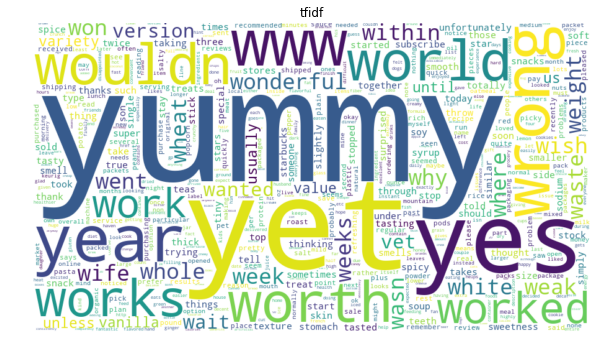

In [280]:
tfidf_dict = vectorizer.vocabulary_
dict_freqs = tfidf_dict
title= 'tfidf'
visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=1000,
                                background_color='white')

In [232]:
##Call of the function - i don't why we called it
#food_words = get_food_words_in_my_corpus(tfidf_dict)

## Cosine similarity calculation

In [308]:
#list_dict = list(tfidf_dict.keys())NO
#Transformacion del diccionario a dataframe para mantener el numero de indice de cada palabra
df_dict= pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index().rename(columns={'index':'words',0:'index'})
list_from_df_dict = df_dict.sort_values(by='index')['words'].tolist()

In [309]:
#Convert the array of the X_array to Dataframe with the words from the dict as columns
my_df = pd.DataFrame(data=X_array, columns=list_from_df_dict)

In [310]:
my_df.head(10)

,10,100,12,15,16,20,24,30,50,able,...,works,world,worth,wouldn,wrong,www,year,yes,yet,yummy
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.281735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
#Select of the index 0 
my_df.iloc[0]

10             0.000000
100            0.000000
12             0.000000
15             0.000000
16             0.000000
20             0.000000
24             0.000000
30             0.000000
50             0.000000
able           0.000000
absolutely     0.000000
actually       0.000000
added          0.000000
adding         0.000000
addition       0.000000
aftertaste     0.000000
ago            0.000000
almond         0.000000
almost         0.000000
along          0.000000
already        0.000000
alternative    0.000000
although       0.143955
amazing        0.000000
amount         0.000000
another        0.000000
anymore        0.000000
anyone         0.000000
anything       0.000000
anyway         0.000000
                 ...   
wanted         0.000000
wasn           0.000000
waste          0.000000
weak           0.000000
week           0.000000
weeks          0.000000
weight         0.000000
went           0.000000
wheat          0.320563
where          0.000000
white          0

In [315]:
#Selection of soup 
selection = my_df[my_df['juice'] > 0]
selection.loc[1563]

10             0.000000
100            0.000000
12             0.000000
15             0.000000
16             0.000000
20             0.000000
24             0.000000
30             0.000000
50             0.000000
able           0.000000
absolutely     0.000000
actually       0.000000
added          0.000000
adding         0.000000
addition       0.000000
aftertaste     0.000000
ago            0.000000
almond         0.000000
almost         0.000000
along          0.000000
already        0.000000
alternative    0.000000
although       0.000000
amazing        0.000000
amount         0.000000
another        0.000000
anymore        0.000000
anyone         0.000000
anything       0.000000
anyway         0.000000
                 ...   
wanted         0.000000
wasn           0.000000
waste          0.000000
weak           0.000000
week           0.000000
weeks          0.000000
weight         0.000000
went           0.000000
wheat          0.000000
where          0.000000
white          0

In [316]:
#Cosine similarity with the one i want to compare, soup, to the all the others
similarity = cosine_similarity([my_df.iloc[1563].as_matrix()],my_df.as_matrix()) 
#the one I want to compare to all the others

In [317]:
similarity.shape

(1, 100000)

In [318]:
#Transform the similarity to a dataframe
df_similarity = pd.DataFrame(similarity[0]).rename(columns={0: "similarity"})
df_similarity

,similarity
0,0.082322
1,0.105345
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [319]:
my_df['similarity'] = df_similarity

In [325]:
my_df.sort_values(by='similarity',ascending=False).tail(10)

,10,100,12,15,16,20,24,30,50,able,...,world,worth,wouldn,wrong,www,year,yes,yet,yummy,similarity
41729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471387,0.0
41720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158587,0.0
54560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [326]:
sampla_def.loc[54560,'Text']

'I tested this coffee using a regular Mr. Coffee brewer and a standard coffee filter.  Although the product is designed for those one-cup brewers, I don\'t have one so I used what I had.  It comes in the sealed pods that are designed to drop right in the the brewer without and mess.  I had to open the pouch to brew it in the Mr. Coffee but still found it made a lot less mess just pouring it from an opening in the pouch.  The first time I just made one cup; the second time I brewed two cups using two pouches.<br /><br />I found the coffee quite good, especially the aroma.  (I really loved the aroma!)  It definitely has floral and berry notes that do not overwhelm the coffee flavor. I like that it is organic and Fair Trade Certified.  This product also claims that "We use beans only from coffee farms that adhere to strict sustainability ethics."  You really can\'t get a much purer source than this.<br /><br />I\'m not a coffee gourmand so I shared this brew with a friend who is very part